# Company Data

In [54]:
!pip install pydotplus
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from io import StringIO
from collections import Counter
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [139]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [140]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [141]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [142]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [143]:
df.shape

(400, 11)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [145]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

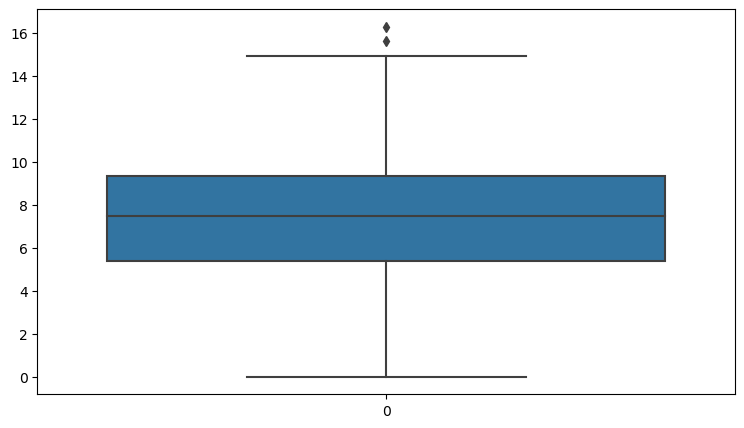

In [146]:
ax = sns.boxplot(df['Sales'])

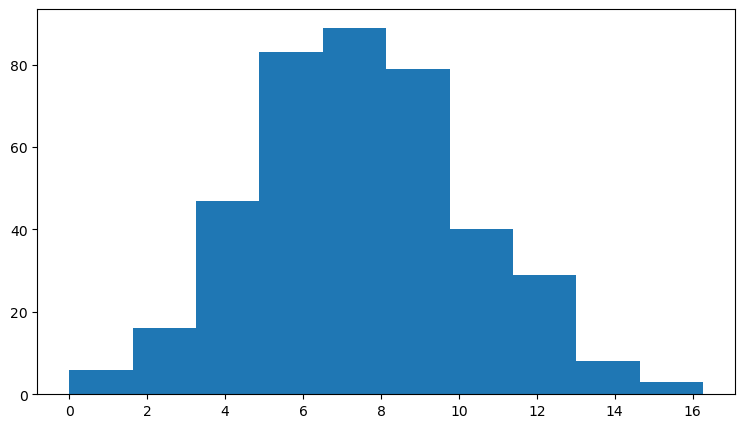

In [147]:
plt.hist('Sales',data=df)
plt.show()

In [148]:
df.Sales.max()

16.27

In [149]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


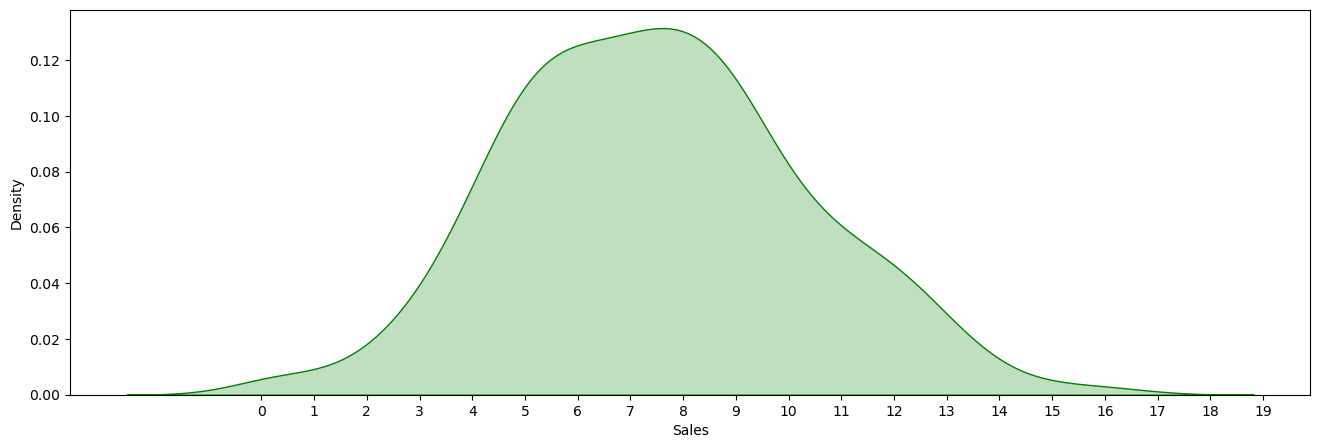

In [150]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

<Figure size 800x800 with 0 Axes>

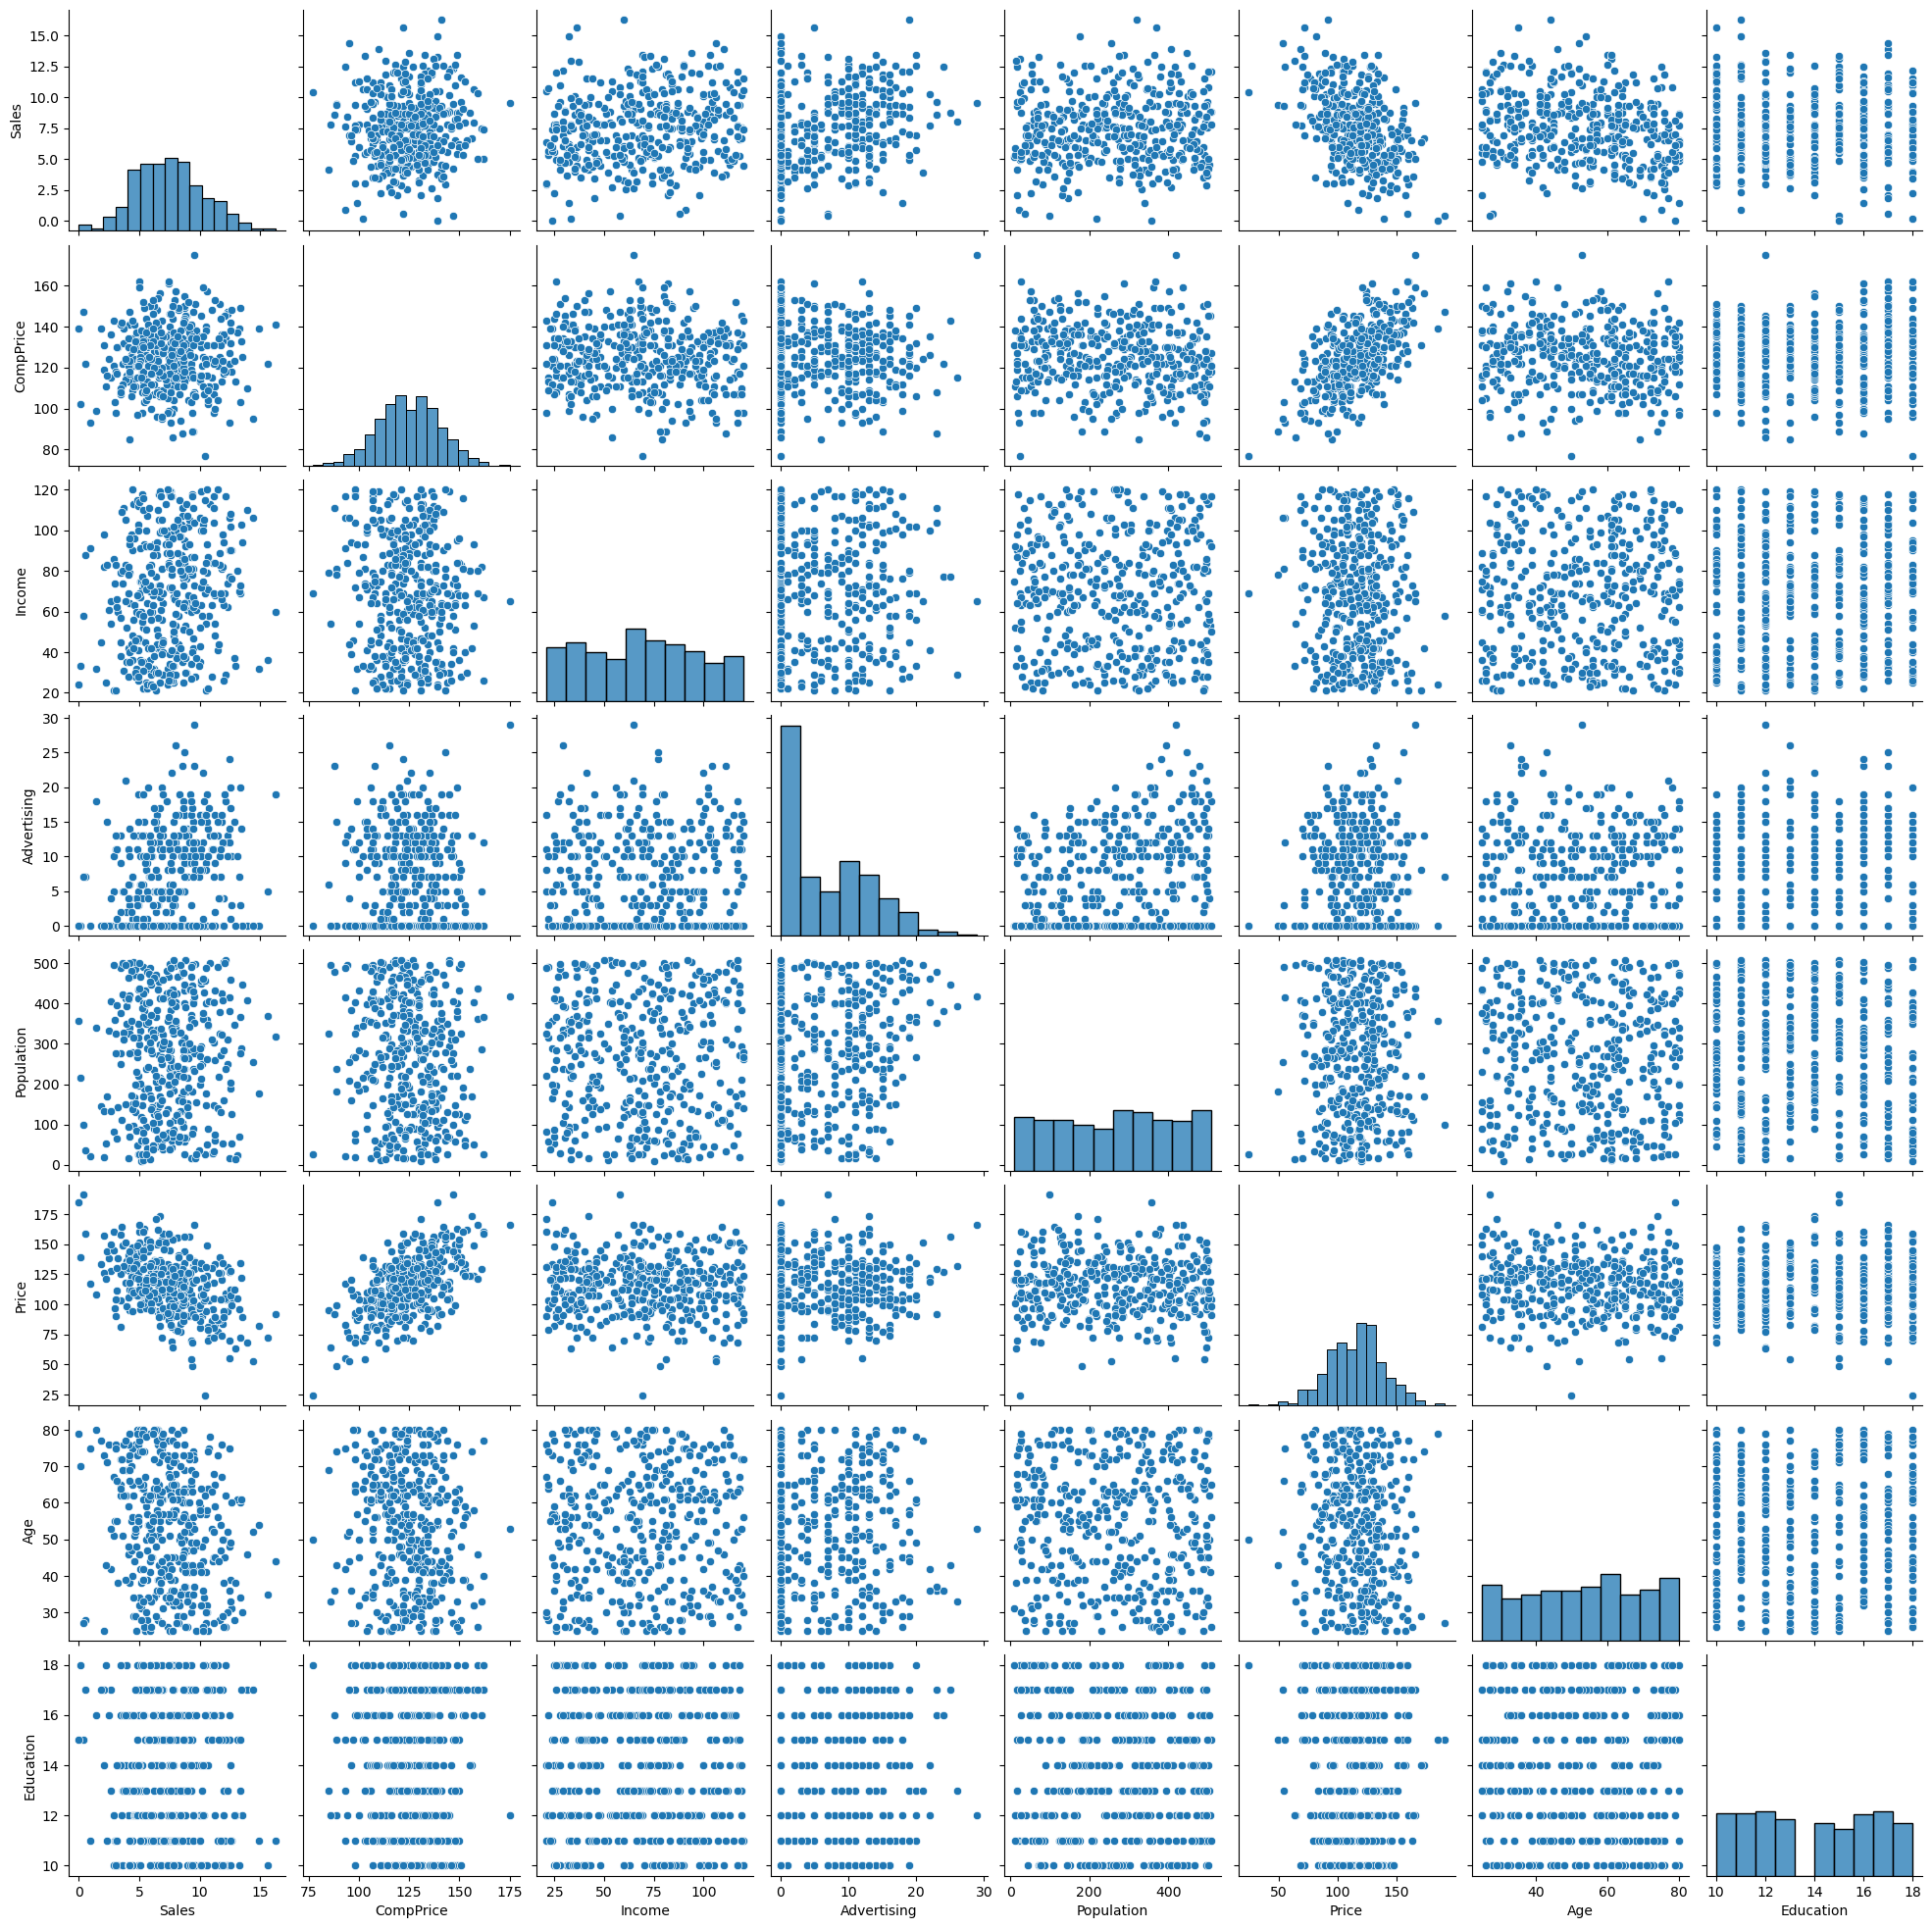

In [151]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

In [152]:
corr = df.corr()

In [153]:
df1 = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

In [154]:
corr = df1.corr()

<Axes: >

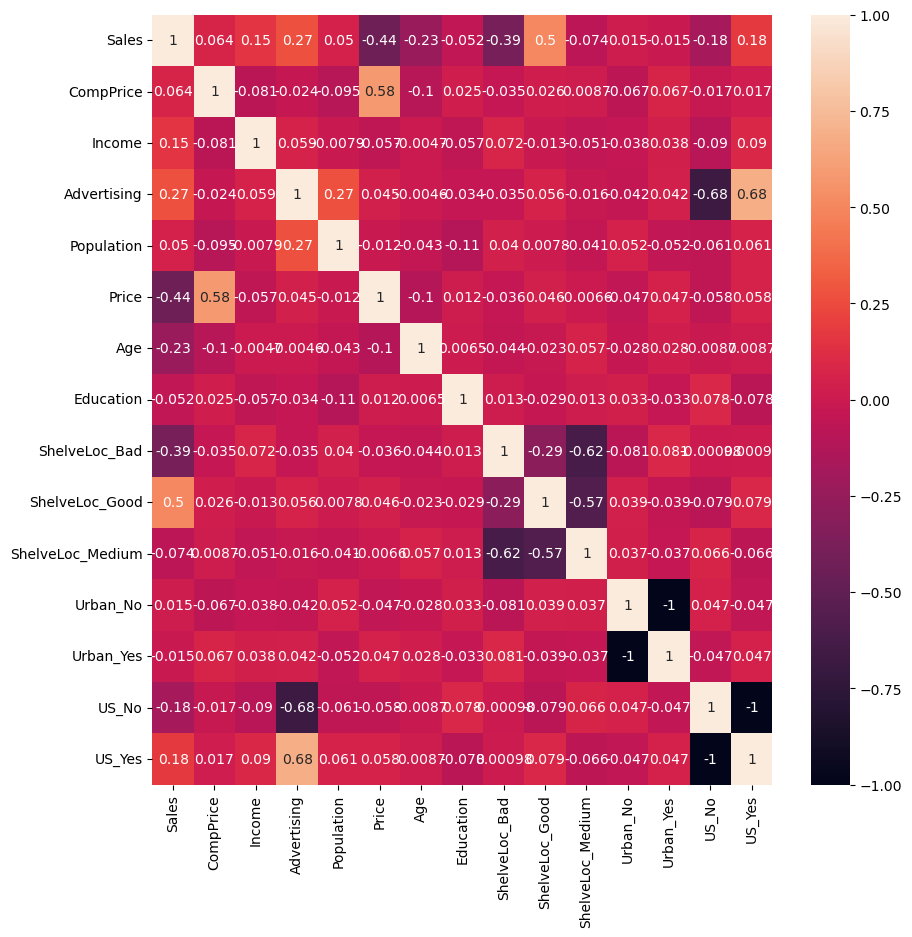

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [158]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
df1.loc[df1["Sales"]>7.49,"sales"]="large"
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  sales  
0      0       1  large  
1      0       1  large  
2      0       1  large  
3      0       1    NaN  
4      1       0    NaN

In [159]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [160]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [161]:
y_train.value_counts()

1    206
0    114
Name: US_Yes, dtype: int64

In [162]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [163]:
pred_train = model.predict(x_train)

In [164]:
accuracy_score(y_train,pred_train)

1.0

In [165]:
confusion_matrix(y_train,pred_train)

array([[114,   0],
       [  0, 206]], dtype=int64)

In [166]:
pred_test = model.predict(x_test)

In [167]:
accuracy_score(y_test,pred_test)

1.0

In [168]:
confusion_matrix(y_test,pred_test)

array([[28,  0],
       [ 0, 52]], dtype=int64)

In [169]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [170]:
df_t

Actual  Predicted
372       0          0
60        1          1
394       1          1
333       1          1
350       1          1
..      ...        ...
216       0          0
22        0          0
55        1          1
135       1          1
373       0          0

[80 rows x 2 columns]

In [171]:
cols = list(df1.columns)

In [172]:
predictors = cols[0:14]
target = cols[14]

In [173]:
dot_data = StringIO()

In [174]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


^
Expected {'GRAPH' | 'DIGRAPH'}  (at char 0), (line:1, col:1)


In [175]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

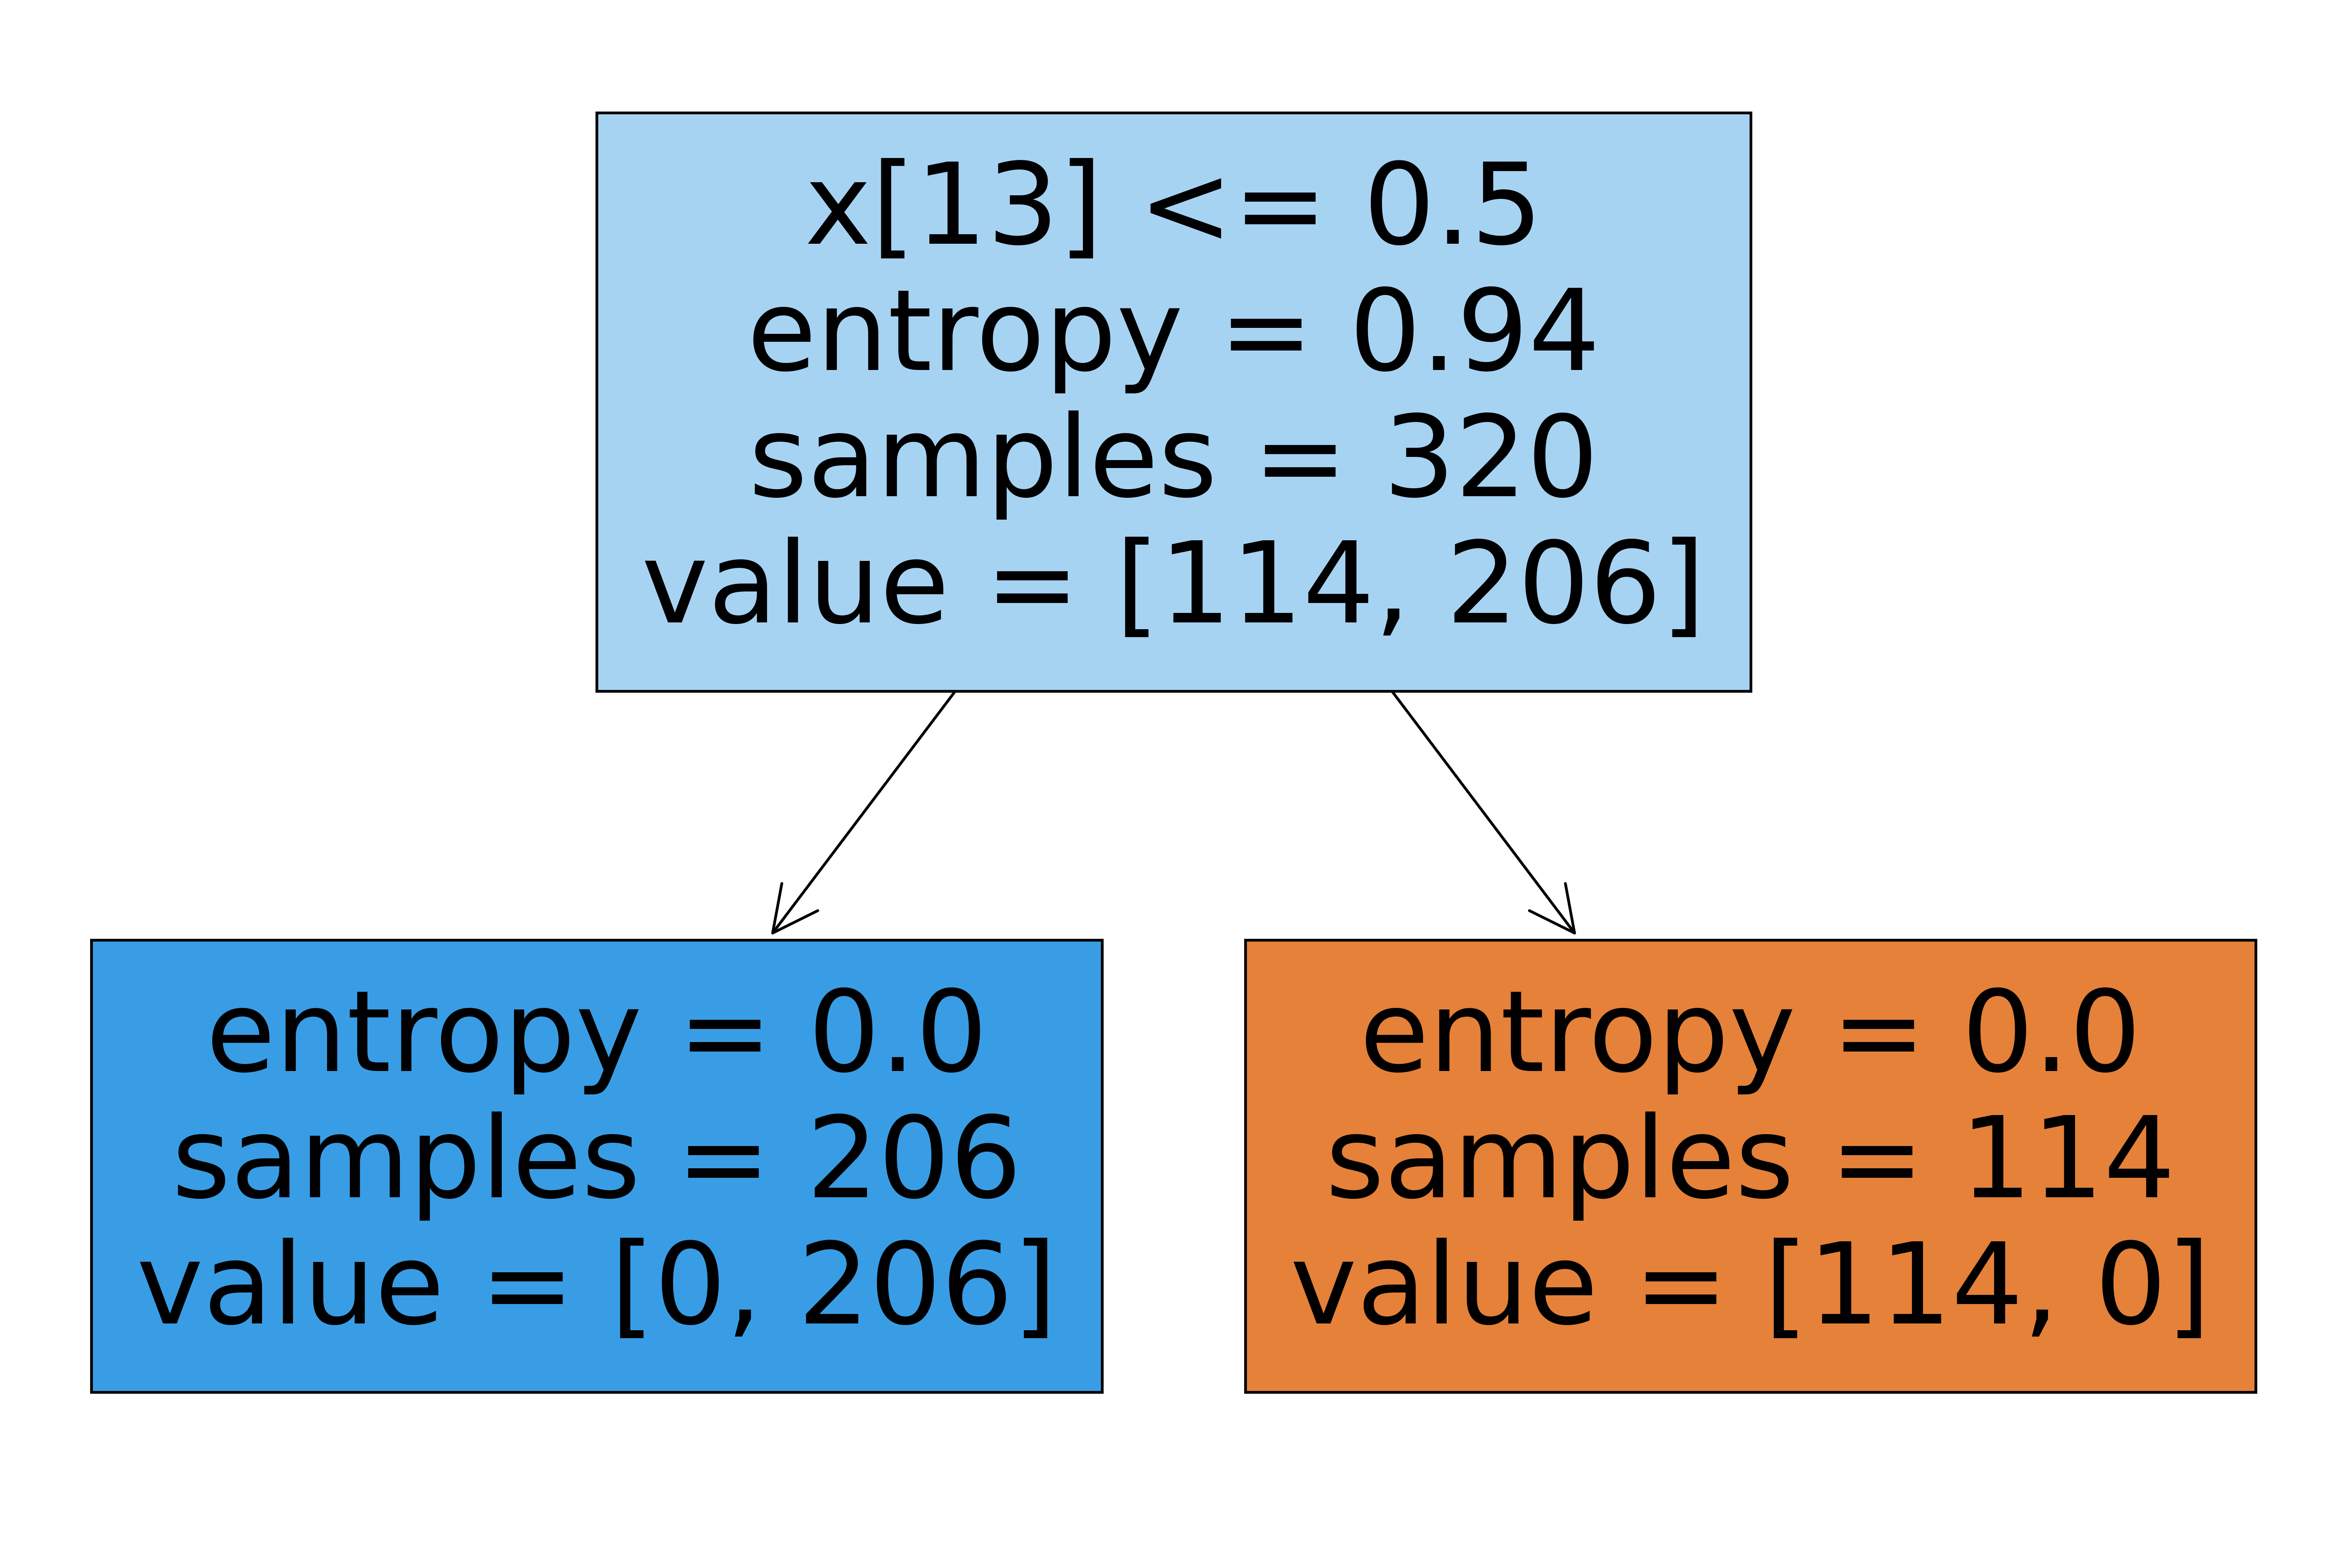

In [176]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [178]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.03366643)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03366643, criterion='entropy',
                       random_state=0)

In [180]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 1.0 
Testing Accuracy 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



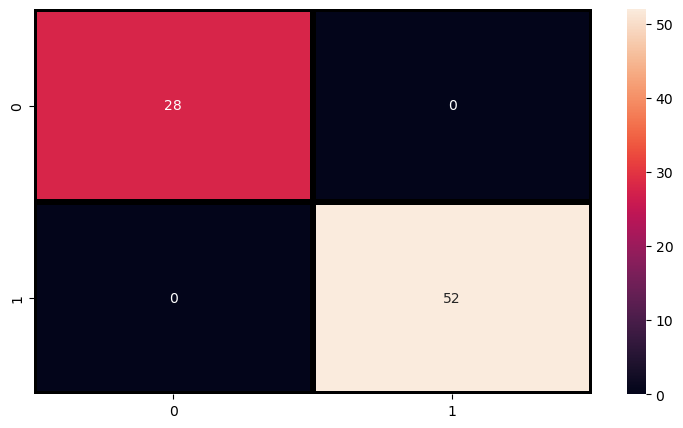

In [181]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

# Fraud Check

In [91]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [92]:
df1 = df.copy()

In [93]:
df1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [94]:
df1.describe().T

count           mean           std      min       25%  \
Taxable.Income   600.0   55208.375000  26204.827597  10003.0  32871.50   
City.Population  600.0  108747.368333  49850.075134  25779.0  66966.75   
Work.Experience  600.0      15.558333      8.842147      0.0      8.00   

                      50%        75%       max  
Taxable.Income    55074.5   78611.75   99619.0  
City.Population  106493.5  150114.25  199778.0  
Work.Experience      15.0      24.00      30.0

In [95]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [96]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

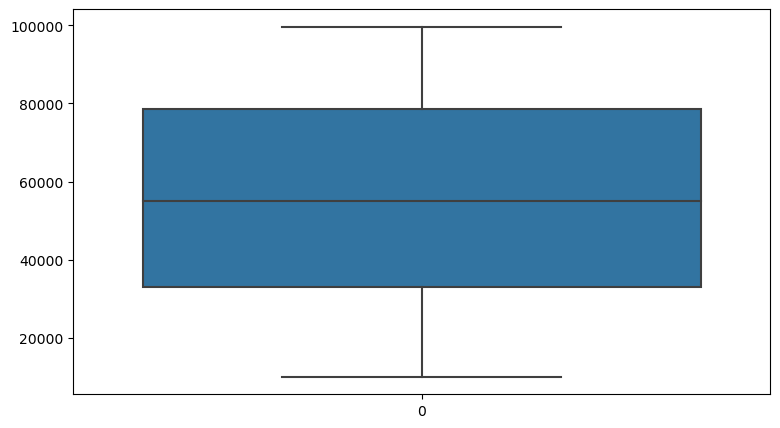

In [97]:
ax = sns.boxplot(df1['Taxable.Income'])

In [98]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


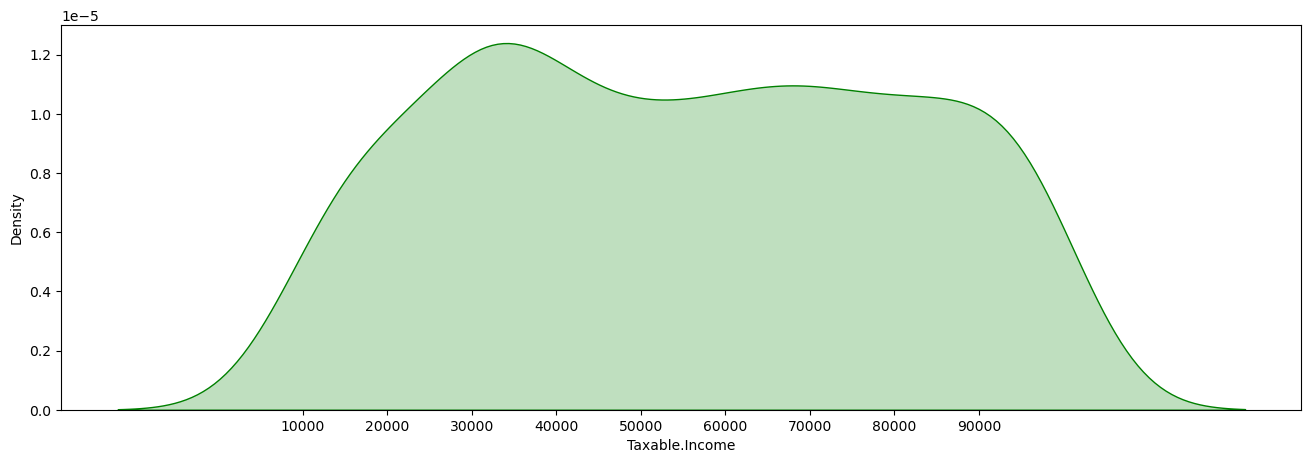

In [99]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

In [100]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

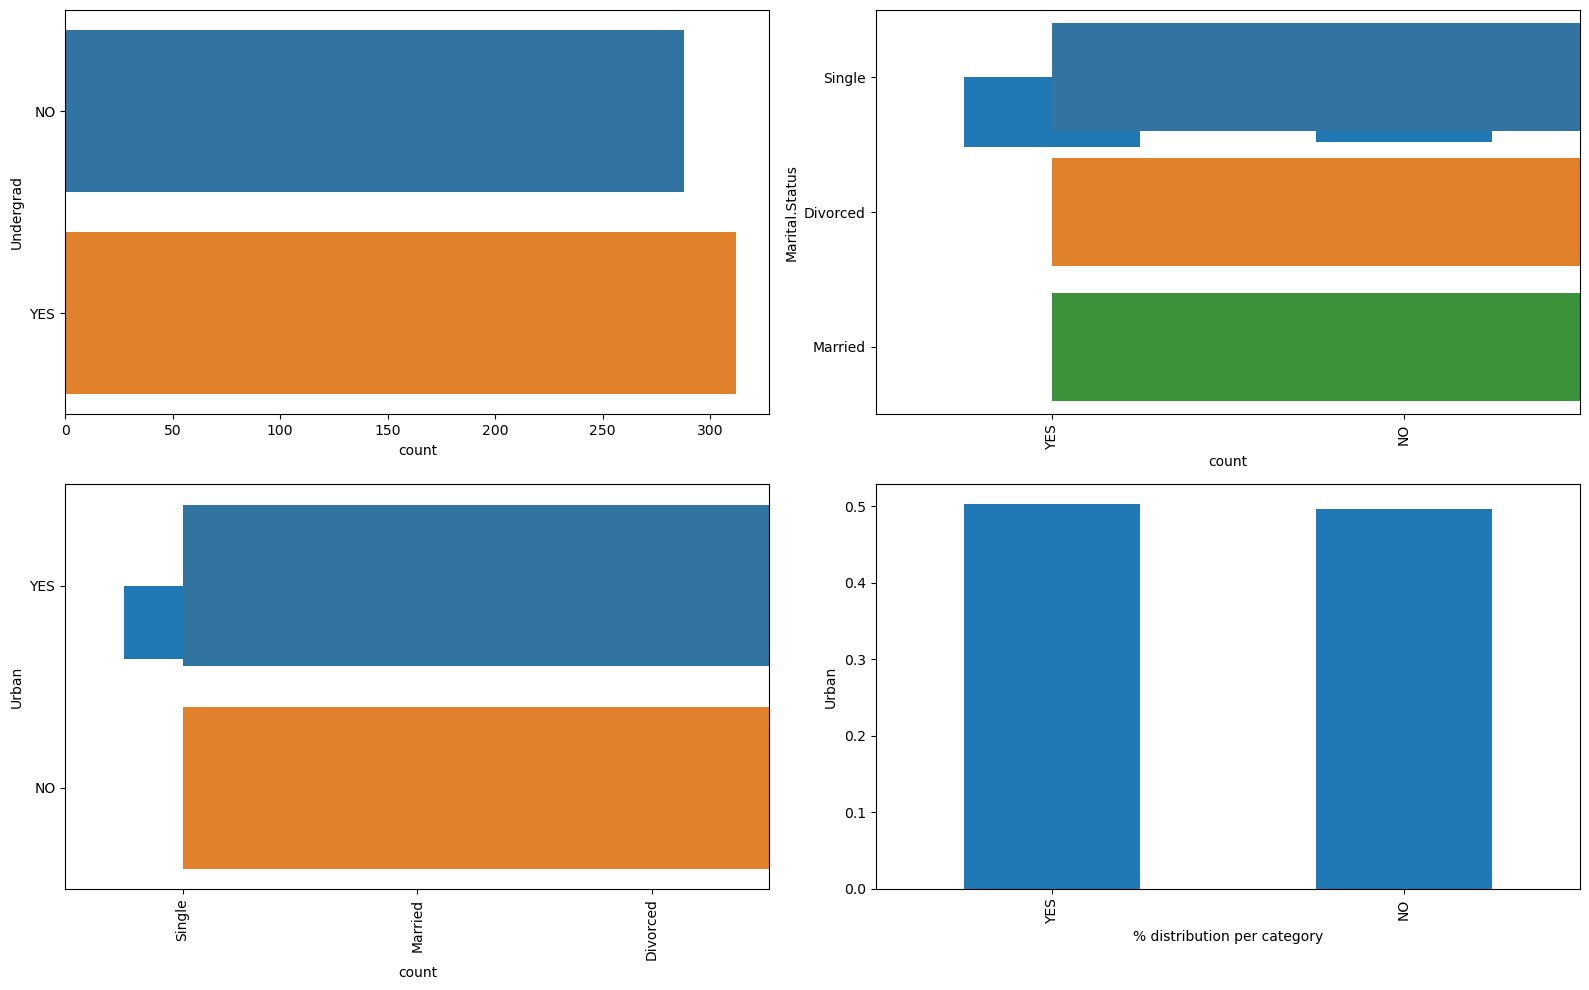

In [101]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [102]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

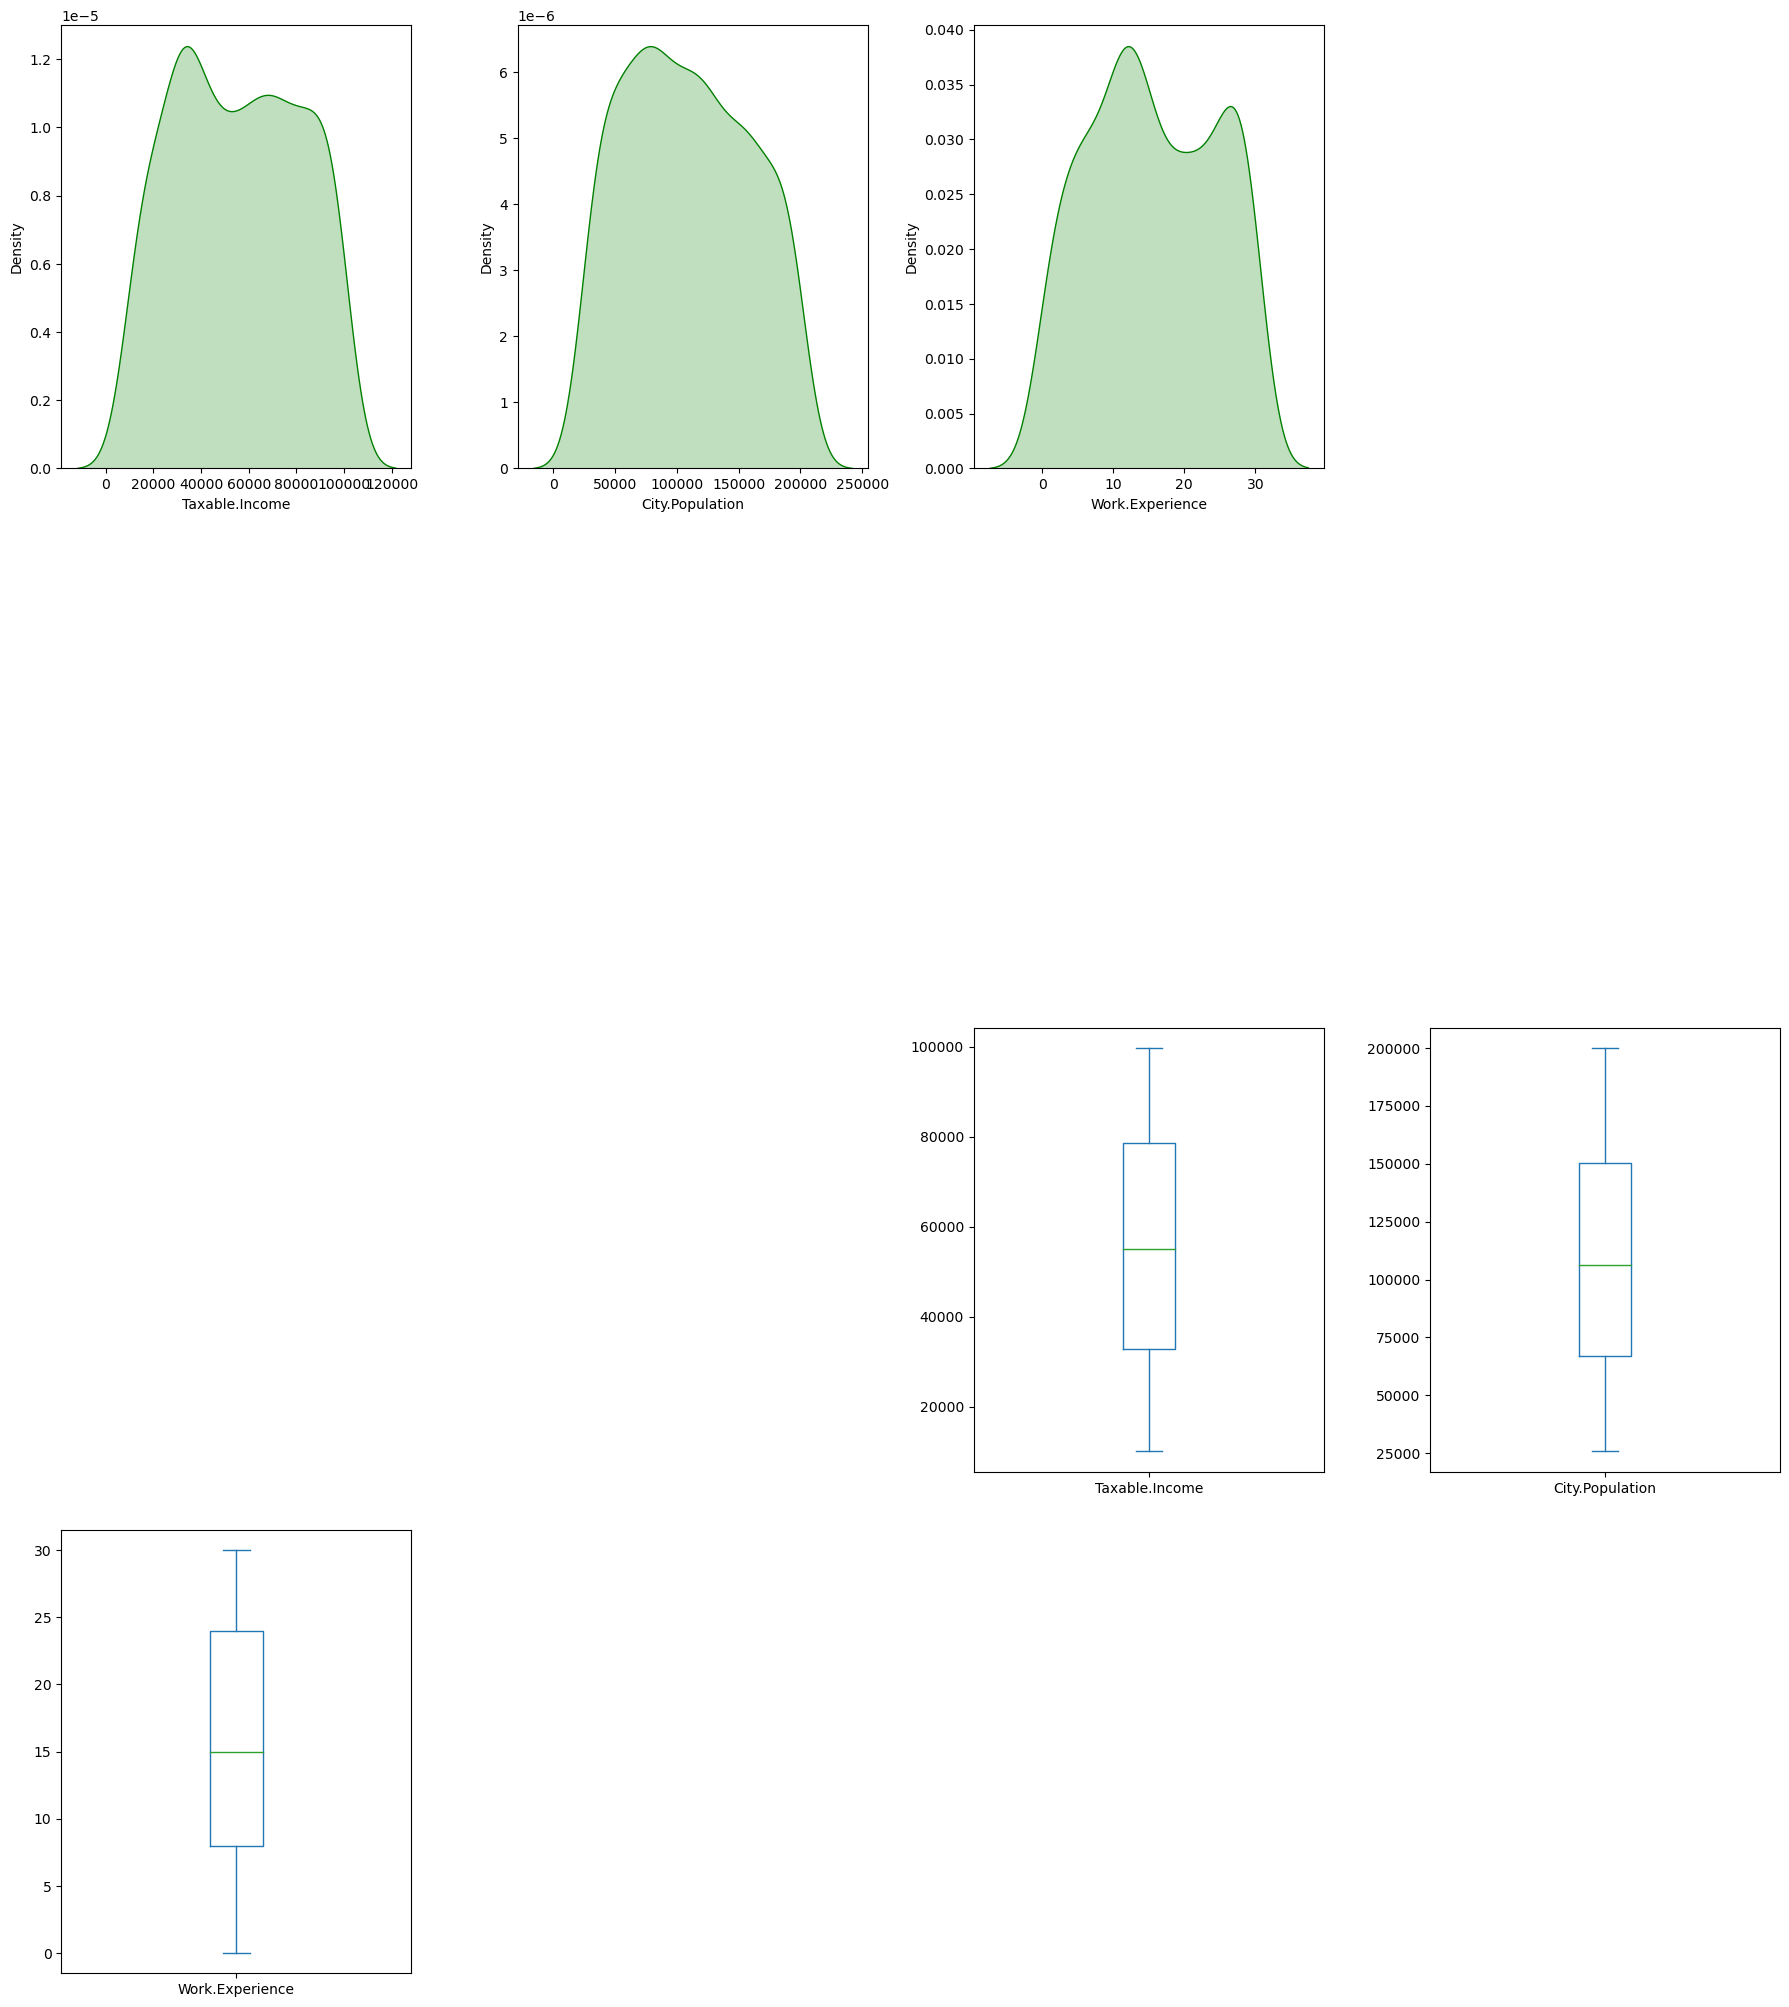

Taxable.Income  City.Population  Work.Experience
skewness        0.030015         0.125009         0.018529
kurtosis       -1.199782        -1.120154        -1.167524

In [103]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [104]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [105]:
corr = df1.corr()

<Axes: >

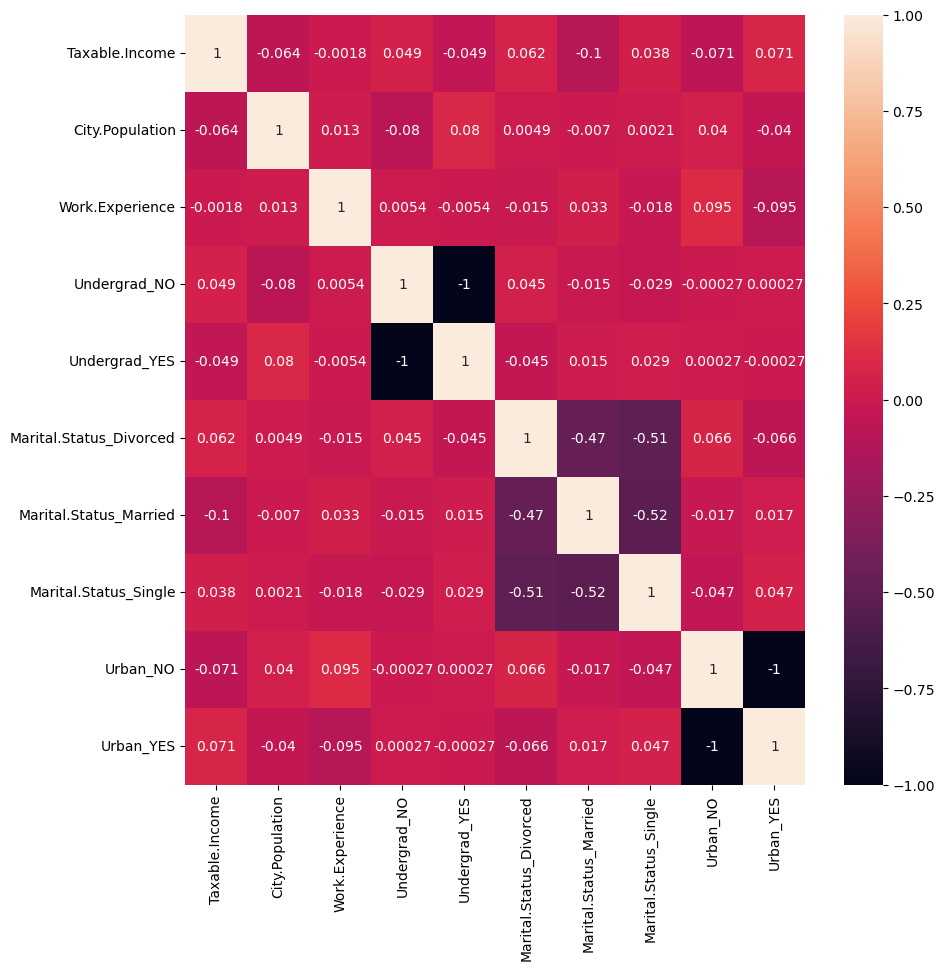

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [107]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [108]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [109]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [111]:
y_train.value_counts()

good     380
risky    100
Name: Taxable.Income, dtype: int64

In [112]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [113]:
pred_train = model.predict(x_train)

In [114]:
accuracy_score(y_train,pred_train)

1.0

In [115]:
confusion_matrix(y_train,pred_train)

array([[380,   0],
       [  0, 100]], dtype=int64)

In [116]:
pred_test = model.predict(x_test)

In [117]:
accuracy_score(y_test,pred_test)

0.6416666666666667

In [118]:
confusion_matrix(y_test,pred_test)

array([[70, 26],
       [17,  7]], dtype=int64)

In [119]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [120]:
df_t

Actual Predicted
566   good      good
133   good      good
489   good      good
505   good      good
515   good     risky
..     ...       ...
288  risky      good
404   good     risky
349  risky      good
592   good      good
258   good      good

[120 rows x 2 columns]

In [121]:
cols = list(df1.columns)

In [122]:
predictors = cols[1:10]
target = cols[0]

In [123]:
dot_data = StringIO()

In [127]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


^
Expected {'GRAPH' | 'DIGRAPH'}  (at char 0), (line:1, col:1)


In [132]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

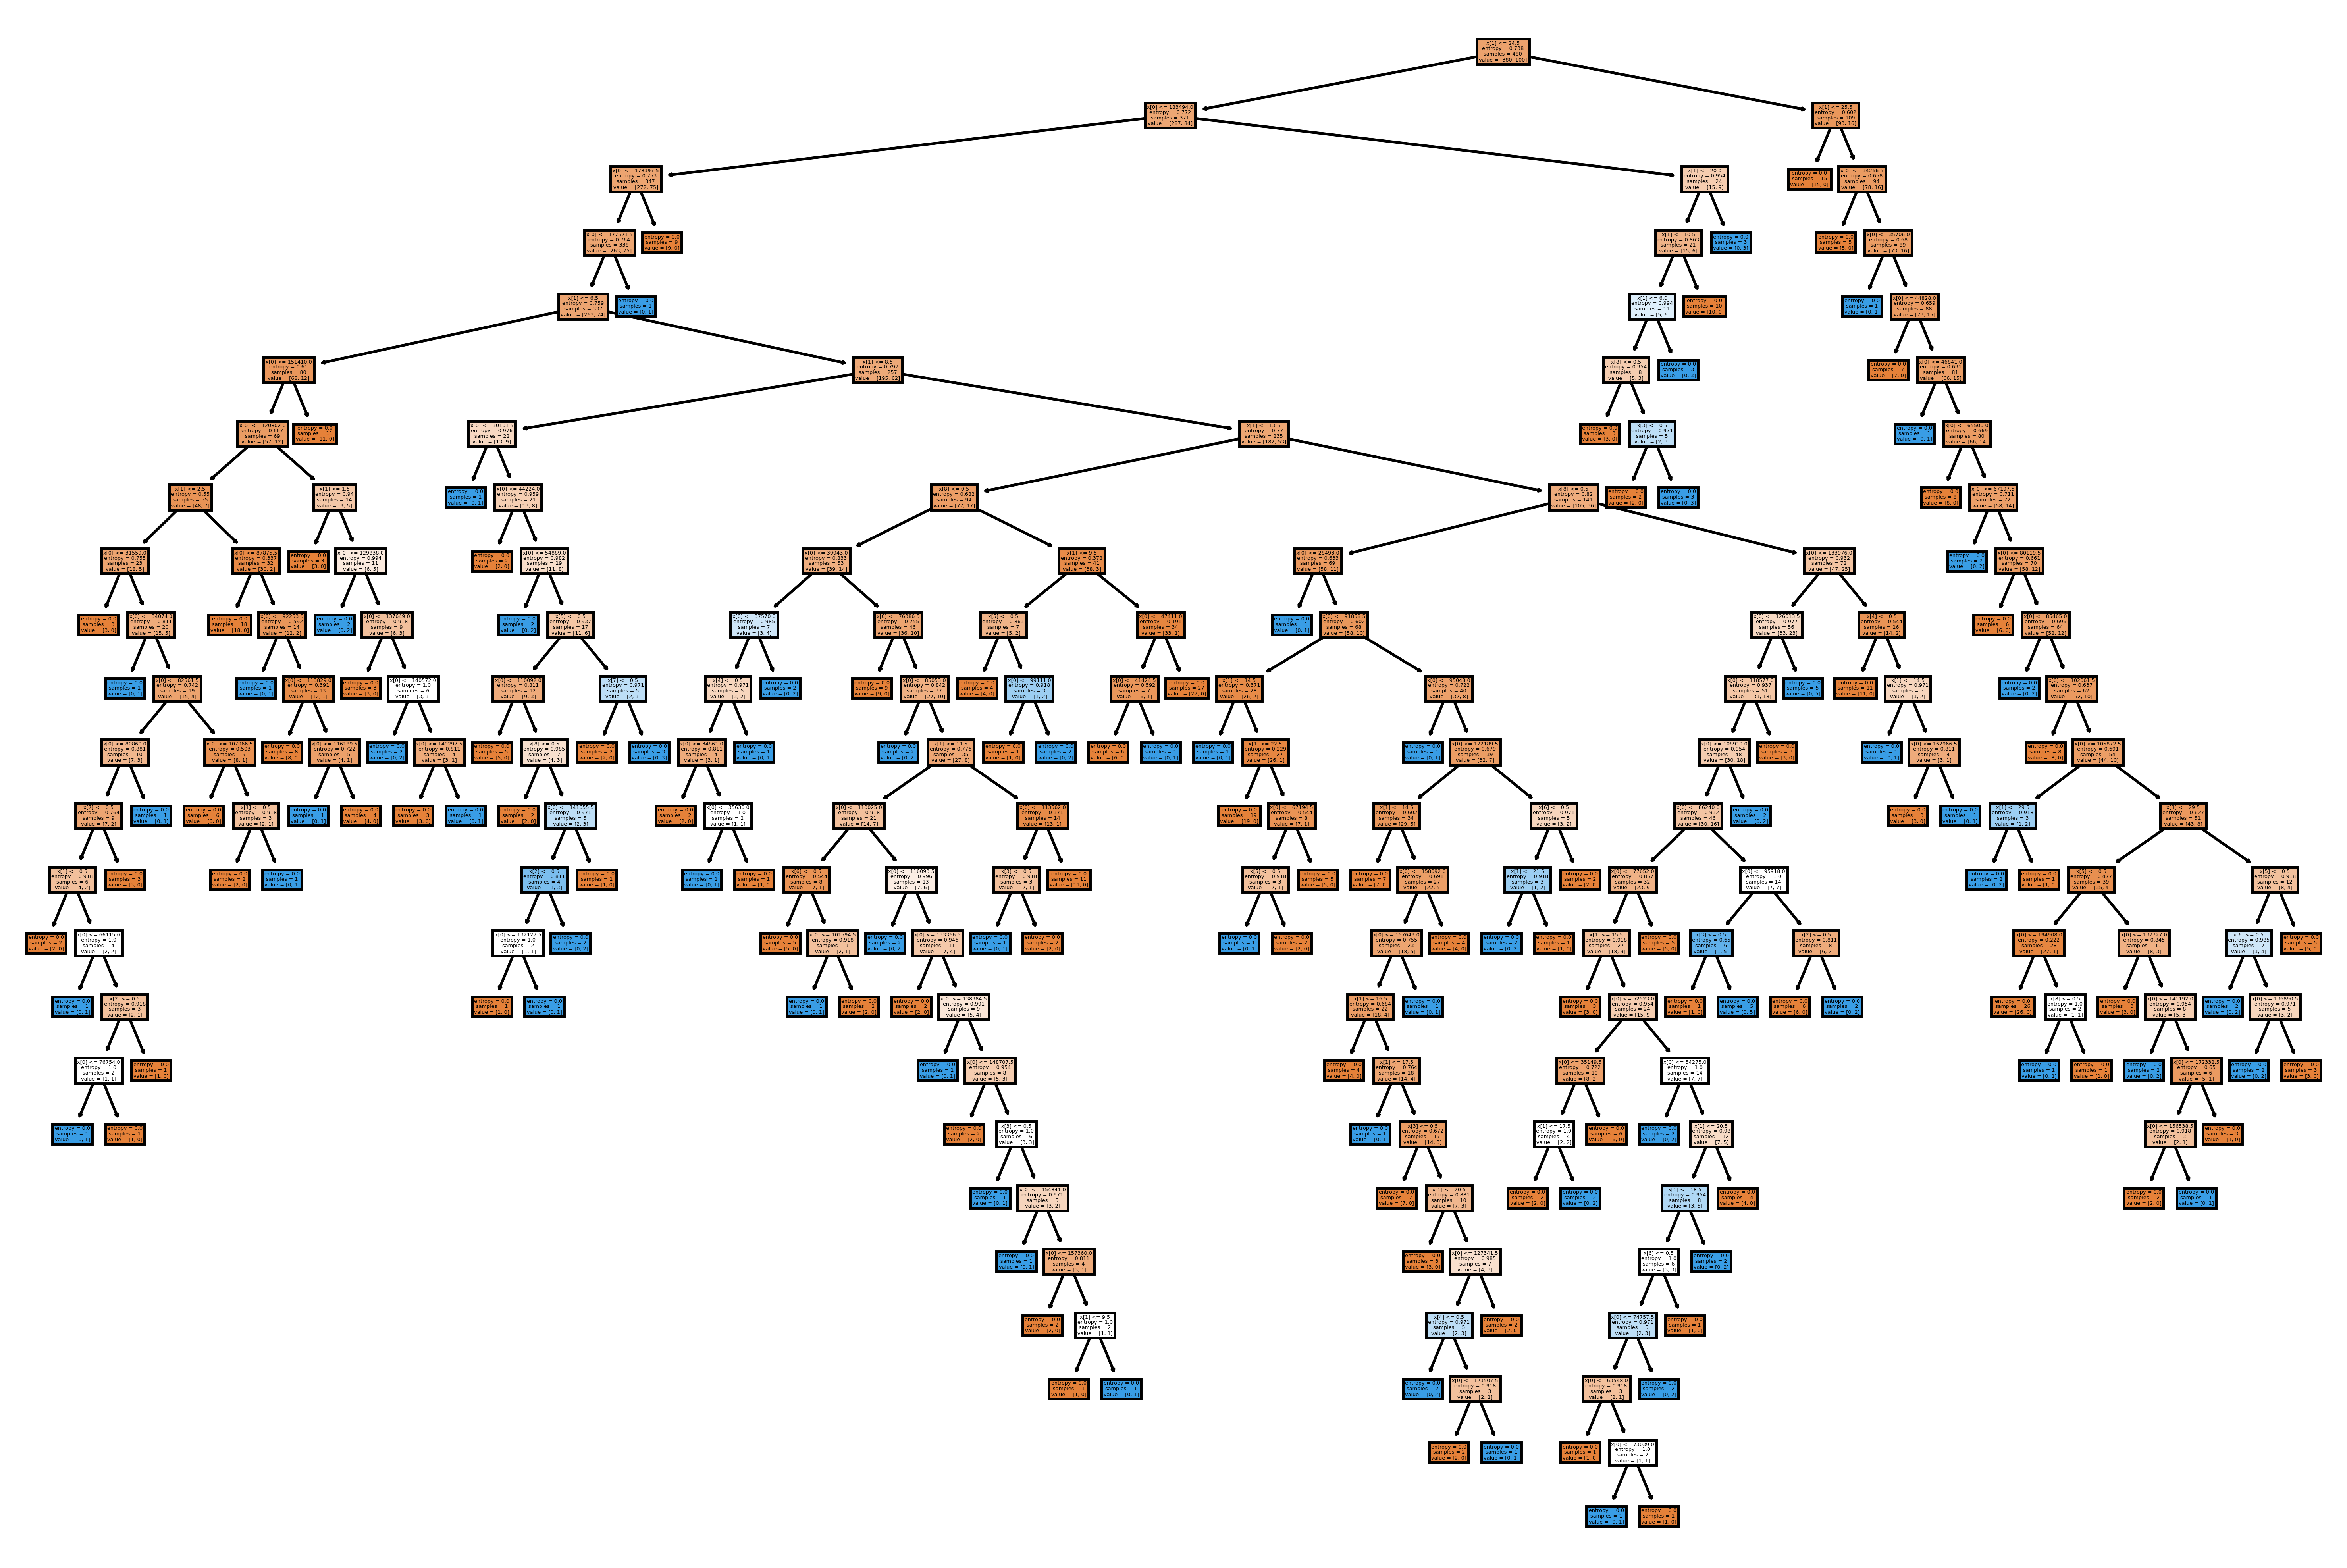

In [133]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [129]:
model.feature_importances_

array([0.57544449, 0.21204916, 0.02747172, 0.0243134 , 0.02217543,
       0.04437719, 0.03283774, 0.00792059, 0.05341029])

In [130]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [131]:
fi

feature  importance
0          City.Population    0.575444
1          Work.Experience    0.212049
8                Urban_YES    0.053410
5   Marital.Status_Married    0.044377
6    Marital.Status_Single    0.032838
2             Undergrad_NO    0.027472
3            Undergrad_YES    0.024313
4  Marital.Status_Divorced    0.022175
7                 Urban_NO    0.007921

# Fraud_Check

In [3]:
fraud = pd.read_csv(r'C:\Users\Administrator\Downloads\Fraud_check.csv')
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [4]:
f1 = fraud.drop(['City.Population'], axis = 1)
f1

Undergrad Marital.Status  Taxable.Income  Work.Experience Urban
0          NO         Single           68833               10   YES
1         YES       Divorced           33700               18   YES
2          NO        Married           36925               30   YES
3         YES         Single           50190               15   YES
4          NO        Married           81002               28    NO
..        ...            ...             ...              ...   ...
595       YES       Divorced           76340                7   YES
596       YES       Divorced           69967                2   YES
597        NO       Divorced           47334                0   YES
598       YES        Married           98592               17    NO
599        NO       Divorced           96519               16    NO

[600 rows x 5 columns]

In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [11]:
y1=np.empty(600, dtype=object)
i=0

for value in f1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [12]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [13]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

Target
0     Good
1     Good
2     Good
3     Good
4     Good
..     ...
595   Good
596   Good
597   Good
598   Good
599   Good

[600 rows x 1 columns]

In [15]:
f2 = pd.concat([f1,t1],axis=1)
f2.head()

Undergrad Marital.Status  Taxable.Income  Work.Experience Urban Target
0        NO         Single           68833               10   YES   Good
1       YES       Divorced           33700               18   YES   Good
2        NO        Married           36925               30   YES   Good
3       YES         Single           50190               15   YES   Good
4        NO        Married           81002               28    NO   Good

In [16]:
f2.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [17]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [18]:
f2.corr()

Taxable.Income  Work.Experience
Taxable.Income         1.000000        -0.001818
Work.Experience       -0.001818         1.000000

In [19]:
f2.groupby(['Undergrad', 'Marital.Status' ,'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

In [23]:
label_encoder = preprocessing.LabelEncoder()
f2['Undergrad']= label_encoder.fit_transform(f2['Undergrad'])
f2['Marital.Status']= label_encoder.fit_transform(f2['Marital.Status'])
f2['Urban']= label_encoder.fit_transform(f2['Urban'])
f2['Target']= label_encoder.fit_transform(f2['Target'])

In [24]:
f2.head()

Undergrad  Marital.Status  Taxable.Income  Work.Experience  Urban  Target
0          0               2           68833               10      1       0
1          1               0           33700               18      1       0
2          0               1           36925               30      1       0
3          1               2           50190               15      1       0
4          0               1           81002               28      0       0

In [25]:
f2.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [26]:
colnames = list(f2.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

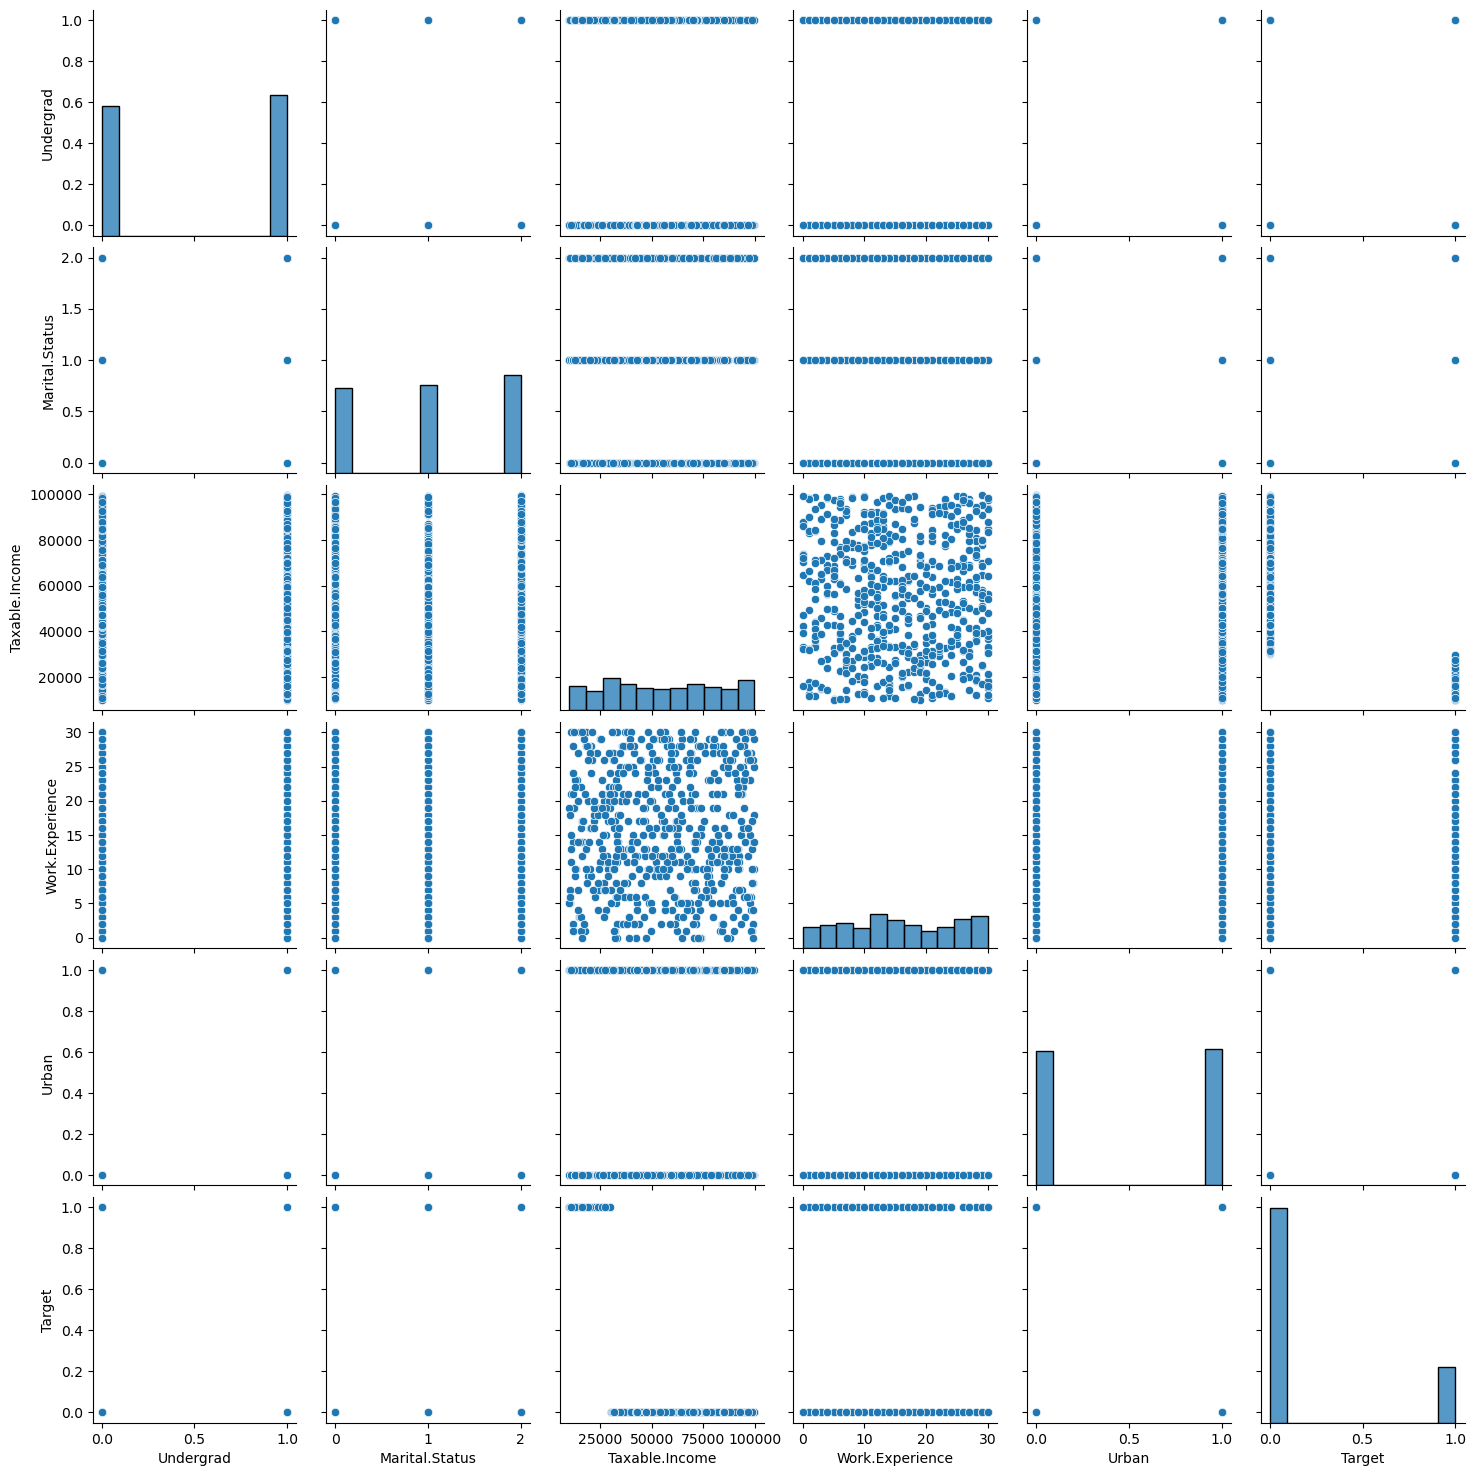

In [27]:
sns.pairplot(f2)

<Axes: xlabel='Taxable.Income', ylabel='Density'>

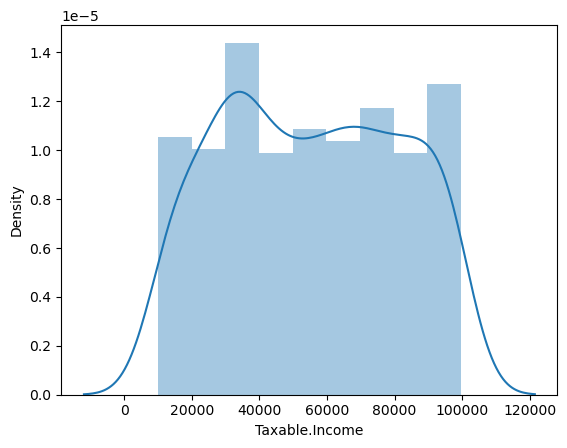

In [28]:
sns.distplot(f2['Taxable.Income'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

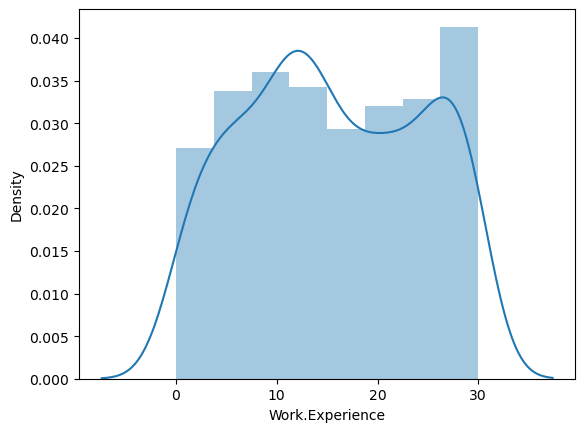

In [29]:
sns.distplot(f2['Work.Experience'])

<Axes: >

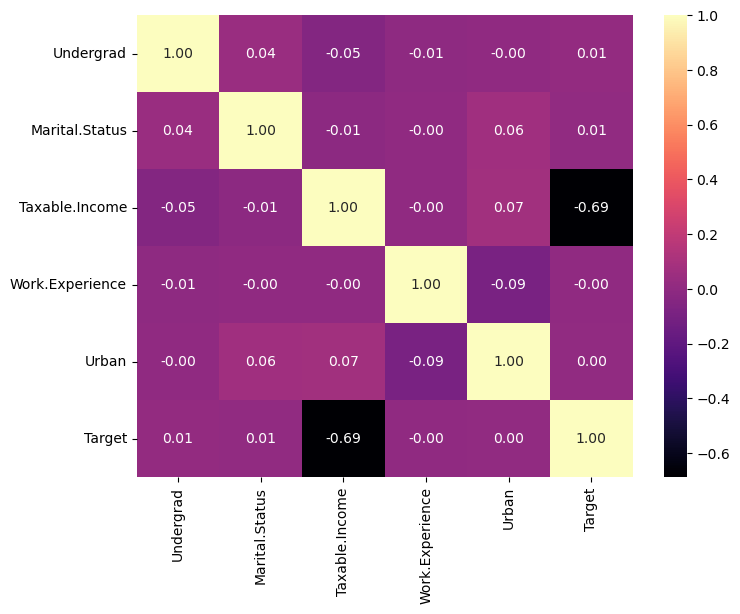

In [30]:
plt.figure(figsize = (8, 6));
sns.heatmap(f2.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

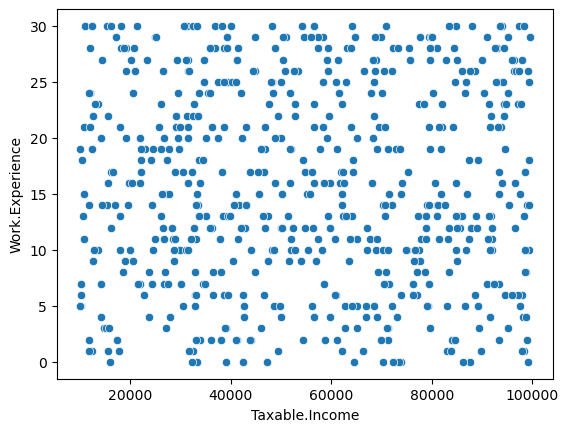

In [31]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = f2)

In [32]:
x=f2.iloc[:,0:5]
y=f2[['Target']]
x.head()

Undergrad  Marital.Status  Taxable.Income  Work.Experience  Urban
0          0               2           68833               10      1
1          1               0           33700               18      1
2          0               1           36925               30      1
3          1               2           50190               15      1
4          0               1           81002               28      0

In [33]:
y.tail()

Target
595       0
596       0
597       0
598       0
599       0

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

In [35]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

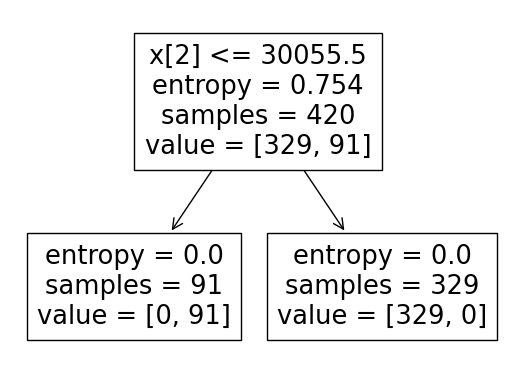

In [36]:
tree.plot_tree(model2);  

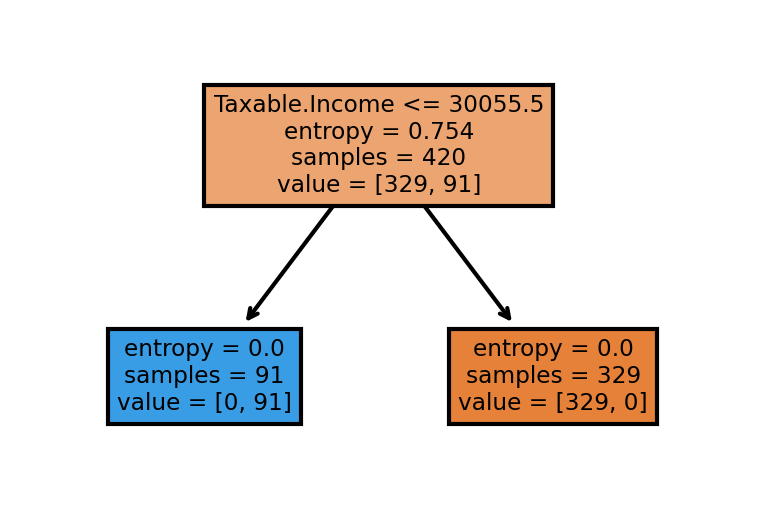

In [37]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               #class_names=cn,
               filled = True);

In [38]:
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

0    147
1     33
dtype: int64

In [39]:
preds2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [40]:
y_test

Target
312       0
174       0
51        0
186       0
223       0
..      ...
240       0
540       1
13        0
101       0
33        0

[180 rows x 1 columns]

In [41]:
y_test2 = y_test.to_numpy()
y_test2 = np.reshape(y_test2, 180)
y_test2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [42]:
pd.crosstab(y_test2,preds2)

col_0    0   1
row_0         
0      147   0
1        0  33

In [43]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.22,random_state=18)

In [46]:
model2_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
model2_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
y_test

Target
129       0
533       1
473       0
401       0
221       0
..      ...
568       0
217       0
186       0
562       0
154       1

[132 rows x 1 columns]

In [49]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3, 132)
y_test3

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [50]:
pred=model2.predict(x_test)
np.mean(pred==y_test3)

1.0

In [51]:
array = f2.values
X = array[:,0:5]
y = array[:,-1]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [55]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
model.score(X_test,y_test)

1.0